# (拍拍贷数据探索)
by (Lulu HWang)

## 数据概览

> 该数据库是拍拍贷一部分贷款还款情况的数据。数据有关于贷款人的各项特征指标，贷款订单的数据，还款的数据。

>1，表LC主要是贷款单的初始数据以及借款人的历史数据信息 。  
2，表2，LCIP主要是贷款单的记录日期时间点的各项还款情况，一共有六个时间点recorddate，所提供数据包含了该客户投资各个时间点的收款情况（Investment Status）。   
3，表LP是某个时间段内所有贷款单的还款情况。（不针对某个投资人）

>因为探索目标是整体逾期数据跟其他数据的相关性，所以选用表LC、LP两个表，LCIS是某个客户投资的贷款单，反映的是该客户投资特征下的表现，所以先不用。 通过以下信息可以知道表LC的ListingId跟表LP应该是一一对应的，后续可以考虑和合并两个表格。

## 数据查看以及清洗

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签\n"
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号"

In [3]:
pd.set_option('precision',2)

In [4]:
basic_color=sb.color_palette()[0]

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
#导入数据
LC=pd.read_csv('LC.csv')

LCIS=pd.read_csv('LCIS.csv')

LP=pd.read_csv('LP.csv')

In [6]:
# 查看，确认是否有重复行
LC.info()

LC.duplicated().value_counts()

LC.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
dtypes: float64(3), int64(7), object(11)
memory usage: 52.6+ MB


False    328553
dtype: int64

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
63771,10447501,8500,12,18.0,2016-04-07,B,其他,是,26,女,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,0,0.0,0.00,0,0
290240,29715451,2647,6,20.0,2017-01-03,C,其他,否,26,女,...,未成功认证,未成功认证,成功认证,未成功认证,未成功认证,8,24886.0,10352.59,45,0
233701,25360611,4000,12,20.0,2016-11-20,C,其他,否,29,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,3,6318.0,4999.72,12,0
188052,21758731,8500,12,20.0,2016-10-10,C,APP闪电,是,42,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,0,0.0,0.00,0,0
322276,32378821,2142,12,22.0,2017-01-25,D,其他,否,27,男,...,未成功认证,未成功认证,成功认证,未成功认证,未成功认证,3,8000.0,3857.22,9,4


In [7]:
LCIS.info()

LCIS.duplicated().value_counts()

LCIS.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292539 entries, 0 to 292538
Data columns (total 37 columns):
ListingId     292539 non-null int64
借款金额          292539 non-null int64
借款期限          292539 non-null int64
借款利率          292539 non-null float64
借款成功日期        292539 non-null object
初始评级          292539 non-null object
借款类型          292539 non-null object
是否首标          292539 non-null object
年龄            292539 non-null int64
性别            292539 non-null object
手机认证          292539 non-null object
户口认证          292539 non-null object
视频认证          292539 non-null object
学历认证          292539 non-null object
征信认证          292539 non-null object
淘宝认证          292539 non-null object
历史成功借款次数      291336 non-null float64
历史成功借款金额      291336 non-null float64
总待还本金         292539 non-null float64
历史正常还款期数      292539 non-null int64
历史逾期还款期数      292539 non-null int64
我的投资金额        292539 non-null int64
当前到期期数        292539 non-null int64
当前还款期数        292539 non-null int64
已还本金  

False    292433
True        106
dtype: int64

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,待还利息,标当前逾期天数,标当前状态,上次还款日期,上次还款本金,上次还款利息,下次计划还款日期,下次计划还款本金,下次计划还款利息,recorddate
286663,25638229,2670,11,16.0,2016/11/23,A,普通,否,25,男,...,4.49,0,正常还款中,NaN,NaN,NaN,2016/12/23,4.67,0.73,2016/11/30
233845,18721112,6903,12,18.0,2016/8/30,B,APP闪电,否,23,男,...,2.92,0,正常还款中,2016/11/28,3.95,0.64,2016/12/30,4.01,0.57,2016/11/30
246055,15899272,8000,12,16.0,2016/7/19,A,APP闪电,是,26,女,...,2.08,0,正常还款中,2016/11/18,4.03,0.51,2016/12/19,4.08,0.46,2016/11/30
128791,13474745,3000,12,18.0,2016/6/15,B,APP闪电,否,26,男,...,1.84,0,正常还款中,2016/10/19,4.07,0.51,2016/12/15,4.13,0.46,2016/10/31
197773,22571061,5654,12,22.0,2016/10/19,D,普通,否,29,女,...,6.77,0,正常还款中,NaN,NaN,NaN,2016/11/19,4.13,1.01,2016/10/31


In [8]:
LP.info()

LP.duplicated().value_counts()

LP.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
ListingId     int64
期数            int64
还款状态          int64
应还本金          float64
应还利息          float64
剩余本金          float64
剩余利息          float64
到期日期          object
还款日期          object
recorddate    object
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


False    3203276
dtype: int64

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
622728,10776771,4,1,183.43,32.58,0.00,0.00,2016-08-10,2016-08-05,2017-02-22
2352663,26310631,6,0,1205.83,73.99,1205.83,73.99,2017-05-30,\N,2017-02-22
586487,10466161,6,1,25.30,3.43,0.00,0.00,2016-10-02,2016-09-21,2017-02-22
1801439,22035791,5,1,485.60,75.96,0.00,0.00,2017-03-17,2016-12-13,2017-02-22
1190988,16328891,8,0,703.23,26.02,703.23,26.02,2017-04-03,\N,2017-02-22


In [9]:
LC['ListingId'].duplicated().value_counts()
LP['ListingId'].duplicated().value_counts()

False    328553
Name: ListingId, dtype: int64

True     2874723
False     328553
Name: ListingId, dtype: int64

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

>根据表LC中历史借款的正常还款、逾期还款的统计，猜测逾期还款期数率应该是比较重要的数据，我们也统计出LP表中的两个字段，供后续探索使用。需要先统计逾期还款期数、正常还款期数，再计算逾期还款率。

In [10]:
# 备份数据
LC1=LC.copy()

In [11]:
LP1=LP.copy()

In [12]:
# 这个函数就是先统计data1每个ListingId分组后的数量，再将数量按ListingId合并到data1
def count_by_id(data1,data2,names,index="ListingId"):
    count_df=data1.groupby(["ListingId"])["ListingId"].count().reset_index(name=names)
    data2=data2.merge(count_df,how='left',on=['ListingId'])
    data2.replace({names:{None:0.0}},inplace=True)
    data2[names]=data2[names].astype(int)
    return data2

In [13]:
# 统计逾期还款期数
LP2=LP1.loc[((LP1["还款状态"]==0)|(LP1["还款状态"]==2)|(LP1["还款状态"]==4))&(LP1["到期日期"]<'2017-02-22')]

LP2["到期日期"].sort_values()
LC1=count_by_id(LP2,LC1,"逾期还款期数")

LC1.sample(10)

LC1.head(5)

975        2015-01-19
1294       2015-01-27
203        2015-02-02
215        2015-02-02
573        2015-02-03
              ...    
851606     2017-02-21
851531     2017-02-21
850706     2017-02-21
852964     2017-02-21
3099703    2017-02-21
Name: 到期日期, Length: 265179, dtype: object

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数
279150,28681111,4500,6,20.0,2016-12-24,C,其他,否,38,男,...,未成功认证,成功认证,未成功认证,未成功认证,5,31412.0,11538.27,20,0,0
42375,8548401,500,12,22.0,2016-02-12,D,APP闪电,否,21,男,...,未成功认证,未成功认证,未成功认证,未成功认证,1,2000.0,1344.36,2,0,0
302956,30819541,3446,12,22.0,2017-01-12,D,其他,否,27,男,...,未成功认证,未成功认证,未成功认证,未成功认证,3,12791.0,6553.26,15,0,0
150588,18470071,2300,6,20.0,2016-08-25,C,其他,否,28,男,...,未成功认证,未成功认证,成功认证,未成功认证,6,13500.0,8608.33,17,0,0
155880,18883251,2090,12,22.0,2016-08-31,D,其他,否,36,女,...,未成功认证,成功认证,未成功认证,未成功认证,6,19825.0,7509.57,14,14,0
181536,21245711,970,6,20.0,2016-10-02,C,APP闪电,否,29,男,...,未成功认证,未成功认证,未成功认证,未成功认证,5,11191.0,7521.90,15,0,0
18407,5418701,4900,6,18.0,2015-11-06,D,其他,否,34,男,...,未成功认证,成功认证,未成功认证,未成功认证,1,4000.0,3042.49,3,0,1
146026,18095721,4032,6,20.0,2016-08-20,C,普通,否,30,男,...,成功认证,成功认证,未成功认证,未成功认证,6,52753.0,28941.19,27,5,1
164730,19561381,8000,12,22.0,2016-09-10,D,APP闪电,是,31,男,...,未成功认证,成功认证,未成功认证,未成功认证,0,0.0,0.00,0,0,0
63669,10438991,3136,12,22.0,2016-04-02,D,其他,否,32,男,...,未成功认证,成功认证,未成功认证,未成功认证,2,10819.0,5363.73,8,3,3


,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16,4
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1,3
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3,1
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1,0
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14,0


In [14]:
LC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328553 entries, 0 to 328552
Data columns (total 22 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
逾期还款期数       328553 non-null int32
dtypes: float64(3), int32(1), int64(7), object(11)
memory usage: 56.4+ MB


>想要重点关注逾期三期及以上的客户，增加一列逾期三期及以上。

In [15]:
# 统计逾期三期及以上的行，0位否，1为是
LP3=LP1.loc[(LP1["还款状态"]==0)&(LP1["到期日期"]<'2017-02-22')]

LC1=count_by_id(LP3,LC1,"逾期三期及以上")

def func(x):
    if x>=3:
        return 1
    else:
        return 0
LC1["逾期三期及以上"]=LC1["逾期三期及以上"].apply(func)

LC1.info()

LC1["逾期三期及以上"].value_counts()

# 统计正常还款期数
from datetime import datetime
LC1["借款成功日期"] = LC1["借款成功日期"].astype("datetime64")
def count_qishu(x):
    year=x.year
    month=x.month
    day=x.day
    count_qishu=(2017-year)*12+2-month
    if day<=22:
        return count_qishu
    else:
        return (count_qishu-1)
LC1["正常还款期数"]=LC1["借款成功日期"].apply(count_qishu)-LC1["逾期还款期数"]
# 因为存在有贷款单在统计日期2017-7-22日前就还清的情况，所以我们更正下正常还款期数。
LC1.loc[(LC1["正常还款期数"]+LC1["逾期还款期数"])>LC1["借款期限"],"正常还款期数"]=(LC1["借款期限"]-LC1["逾期还款期数"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328553 entries, 0 to 328552
Data columns (total 23 columns):
ListingId    328553 non-null int64
借款金额         328553 non-null int64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null object
初始评级         328553 non-null object
借款类型         328553 non-null object
是否首标         328553 non-null object
年龄           328553 non-null int64
性别           328553 non-null object
手机认证         328553 non-null object
户口认证         328553 non-null object
视频认证         328553 non-null object
学历认证         328553 non-null object
征信认证         328553 non-null object
淘宝认证         328553 non-null object
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
逾期还款期数       328553 non-null int32
逾期三期及以上      328553 non-null int64
dtypes: float64(3), int32(1), int64(8), object(11)
memory usage: 58

0    321673
1      6880
Name: 逾期三期及以上, dtype: int64

In [16]:
LC1.sample(5)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数,逾期三期及以上,正常还款期数
24259,6397241,6000,12,22.0,2015-12-09,D,普通,是,20,男,...,未成功认证,未成功认证,0,0.0,0.00,0,0,0,0,12
86333,12246521,6000,12,22.0,2016-05-23,D,普通,是,31,女,...,未成功认证,未成功认证,0,0.0,0.00,0,0,3,0,5
130257,16593851,5200,12,20.0,2016-08-02,C,其他,否,30,男,...,未成功认证,未成功认证,2,6531.0,3488.69,11,0,0,0,6
302761,30793391,2500,6,20.0,2017-01-26,E,其他,否,31,男,...,未成功认证,未成功认证,9,31343.0,8559.25,44,1,0,0,0
136350,17178371,7000,6,16.0,2016-08-12,A,APP闪电,是,23,男,...,未成功认证,未成功认证,0,0.0,0.00,0,0,0,0,6


>考虑剩余本金、剩余利息是不是也对逾期还款率有线性关系，增加两列。

In [17]:
# 统计剩余本金、剩余利息
count_df=LP1.groupby(["ListingId"])["剩余本金","剩余利息"].sum().reset_index()

count_df

LC1=LC1.merge(count_df,how='left',on=['ListingId'])

,ListingId,剩余本金,剩余利息
0,126541,0.00,0.00
1,133291,0.00,0.00
2,142421,19160.56,2826.32
3,149711,0.00,0.00
4,152141,0.00,0.00
...,...,...,...
328548,32819271,2389.00,141.26
328549,32819381,7000.00,781.28
328550,32819451,2017.00,119.24
328551,32819511,6406.00,714.92


In [18]:
# 计算字段，历史逾期还款率，逾期还款率
LC1["历史逾期还款率"]=LC1["历史逾期还款期数"]/(LC1["历史逾期还款期数"]+LC1["历史正常还款期数"])
LC1["逾期还款率"]=LC1["逾期还款期数"]/(LC1["逾期还款期数"]+LC1["正常还款期数"])

>年龄分组统计，更加贴合实际，按大致还款能力，分为四个年龄段。

In [19]:
LC1["年龄"].describe()

count    328553.00
mean         29.14
std           6.62
min          17.00
25%          24.00
50%          28.00
75%          33.00
max          56.00
Name: 年龄, dtype: float64

In [20]:
# 年龄分组
def age_class(x):
    if x<=25:
        return("17-25")
    elif x<=35:
        return("26-35")
    elif x<=45:
        return("36-45")
    else:
        return("46-56")

LC1['年龄']=LC1['年龄'].apply(age_class)

In [21]:
LC1.sample()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数,逾期三期及以上,正常还款期数,剩余本金,剩余利息,历史逾期还款率,逾期还款率
62053,10302311,3415,6,20.0,2016-03-31,C,APP闪电,是,26-35,男,...,0.0,0,0,1,0,5,0.0,0.0,NaN,0.17


>统计下，通过认证的数量，猜测是不是认证数较多的情况，逾期还款率会较低。

In [22]:
# 统计通过认证的数量
def count_renzheng(series):
    list=['手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证']
    count=0
    for i in list:
        if series[i]=="成功认证":
            count+=1
    return count

LC1["认证数"]=LC1.apply(count_renzheng,axis=1)

In [23]:
LC1.sample(10)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,历史正常还款期数,历史逾期还款期数,逾期还款期数,逾期三期及以上,正常还款期数,剩余本金,剩余利息,历史逾期还款率,逾期还款率,认证数
50253,9316691,6000,12,24.0,2016-03-09,E,普通,是,26-35,男,...,0,0,2,0,9,556.27,11.08,NaN,0.18,1
151162,18520101,7000,12,20.0,2016-08-26,C,APP闪电,是,26-35,女,...,0,0,0,0,5,0.00,0.00,NaN,0.00,0
46452,8966861,3411,12,20.0,2016-02-25,C,其他,否,26-35,男,...,5,0,10,1,1,3151.88,323.79,0.0,0.91,0
300658,30592631,4000,12,22.0,2017-01-11,D,APP闪电,否,36-45,女,...,6,0,0,0,1,3698.96,419.11,0.0,0.00,0
12094,4414351,12000,6,18.0,2015-09-25,C,普通,否,26-35,男,...,10,0,0,0,6,0.00,0.00,0.0,0.00,1
211716,23613461,858,12,22.0,2016-11-01,D,APP闪电,否,17-25,男,...,61,0,0,0,3,592.51,49.89,0.0,0.00,0
158805,19116571,3000,6,20.0,2016-09-03,D,其他,否,26-35,男,...,6,0,0,0,5,0.00,0.00,0.0,0.00,0
323259,32447471,6000,12,22.0,2017-01-25,D,普通,是,36-45,男,...,0,0,0,0,0,6000.00,738.72,NaN,NaN,0
179085,21057651,1042,6,20.0,2016-09-29,C,APP闪电,否,26-35,女,...,2,0,0,0,4,0.00,0.00,0.0,0.00,0
235831,25523241,3358,12,22.0,2016-11-22,D,普通,否,26-35,女,...,3,0,0,0,3,2585.86,242.66,0.0,0.00,0


In [24]:
# 年龄转成有序分类
LC1["年龄"]=LC1["年龄"].astype("category")
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ['17-25','26-35','36-45','46-56'])
LC1['年龄'] = LC1['年龄'].astype(ordered_var)

In [25]:
# 数据类型标准化
LC1["ListingId"] = LC1["ListingId"].astype("object")
LC1["借款金额"] = LC1["借款金额"].astype("float64")
LC1["借款成功日期"] = LC1["借款成功日期"].astype("datetime64")
columns=['初始评级','借款类型','是否首标','性别','手机认证','户口认证','视频认证','学历认证','征信认证','淘宝认证','逾期三期及以上']
for c in columns:
    LC1[c] = LC1[c].astype("category")
    
LC1["逾期还款期数"] = LC1["逾期还款期数"].astype("int64")

>信用评级按类别，固定次序。

In [26]:
# 信用评级转成有序分类
ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ['A','B','C','D','E','F'])
LC1['初始评级'] = LC1['初始评级'].astype(ordered_var)

In [27]:
LC1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328553 entries, 0 to 328552
Data columns (total 29 columns):
ListingId    328553 non-null object
借款金额         328553 non-null float64
借款期限         328553 non-null int64
借款利率         328553 non-null float64
借款成功日期       328553 non-null datetime64[ns]
初始评级         328553 non-null category
借款类型         328553 non-null category
是否首标         328553 non-null category
年龄           328553 non-null category
性别           328553 non-null category
手机认证         328553 non-null category
户口认证         328553 non-null category
视频认证         328553 non-null category
学历认证         328553 non-null category
征信认证         328553 non-null category
淘宝认证         328553 non-null category
历史成功借款次数     328553 non-null int64
历史成功借款金额     328553 non-null float64
总待还本金        328553 non-null float64
历史正常还款期数     328553 non-null int64
历史逾期还款期数     328553 non-null int64
逾期还款期数       328553 non-null int64
逾期三期及以上      328553 non-null category
正常还款期数       328553 non-null i

In [28]:
LC1.sample(10)

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,历史正常还款期数,历史逾期还款期数,逾期还款期数,逾期三期及以上,正常还款期数,剩余本金,剩余利息,历史逾期还款率,逾期还款率,认证数
39841,8186551,7000.0,12,22.0,2016-02-03,D,普通,是,36-45,男,...,0,0,2,0,10,0.00,0.00,NaN,0.17,1
241988,25988591,3264.0,12,20.0,2016-11-27,C,其他,否,26-35,女,...,3,0,0,0,2,2763.96,259.54,0.0,0.00,0
62791,10363571,6000.0,6,20.0,2016-04-05,C,普通,否,26-35,女,...,6,0,0,0,6,0.00,0.00,0.0,0.00,2
324664,32552461,2705.0,8,18.0,2017-01-26,B,其他,否,17-25,女,...,17,0,0,0,0,2705.00,185.72,0.0,NaN,1
291806,29841071,2000.0,12,22.0,2017-01-04,D,APP闪电,否,26-35,男,...,24,0,0,0,1,1696.20,175.60,0.0,0.00,0
7707,3681251,4000.0,12,22.0,2015-08-18,D,普通,是,26-35,男,...,0,0,2,0,10,0.00,0.00,NaN,0.17,1
213678,23756261,4014.0,6,20.0,2016-11-02,C,普通,否,26-35,男,...,18,0,0,0,3,2056.75,68.93,0.0,0.00,2
35907,7673271,1805.0,12,22.0,2016-01-16,D,APP闪电,是,26-35,男,...,0,0,6,0,6,0.00,0.00,NaN,0.50,0
122146,15871641,2216.0,6,20.0,2016-07-19,C,其他,否,46-56,男,...,6,0,1,0,5,0.00,0.00,0.0,0.17,1
266013,27637331,10000.0,12,20.0,2016-12-14,C,其他,否,17-25,男,...,37,0,0,0,2,8467.98,795.42,0.0,0.00,2


In [29]:
LC1.columns

Index(['ListingId', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标',
       '年龄', '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
       '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '逾期还款期数', '逾期三期及以上',
       '正常还款期数', '剩余本金', '剩余利息', '历史逾期还款率', '逾期还款率', '认证数'],
      dtype='object')

In [30]:
# 简单查看各个数据的分布值
columns=[ '借款期限', '初始评级', '借款类型', '是否首标',
       '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证','逾期还款期数', '逾期三期及以上',
       '正常还款期数']
for c in columns:
    print ("---- %s ---" % c)
    print (LC1[c].value_counts())

---- 借款期限 ---
12    215330
6      84486
9      10769
10      5472
11      5351
3       1993
8       1852
7       1239
2        802
24       636
18       367
4         94
5         85
1         42
15        31
21         2
17         1
20         1
Name: 借款期限, dtype: int64
---- 初始评级 ---
D    134860
C    131705
B     33188
E     17027
A     10284
F      1489
Name: 初始评级, dtype: int64
---- 借款类型 ---
普通       118103
APP闪电    112079
其他        97302
电商         1069
Name: 借款类型, dtype: int64
---- 是否首标 ---
否    241090
是     87463
Name: 是否首标, dtype: int64
---- 性别 ---
男    221946
女    106607
Name: 性别, dtype: int64
---- 手机认证 ---
未成功认证    205546
成功认证     123007
Name: 手机认证, dtype: int64
---- 户口认证 ---
未成功认证    318448
成功认证      10105
Name: 户口认证, dtype: int64
---- 视频认证 ---
未成功认证    310052
成功认证      18501
Name: 视频认证, dtype: int64
---- 学历认证 ---
未成功认证    214429
成功认证     114124
Name: 学历认证, dtype: int64
---- 征信认证 ---
未成功认证    318947
成功认证       9606
Name: 征信认证, dtype: int64
---- 淘宝认证 ---
未成功认证    327401
成功认证  

In [31]:
LC1.describe()

,借款金额,借款期限,借款利率,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数,正常还款期数,剩余本金,剩余利息,历史逾期还款率,逾期还款率,认证数
count,328553.00,328553.00,328553.00,328553.00,3.29e+05,3.29e+05,328553.00,328553.00,328553.00,328553.00,328553.00,328553.00,239602.00,317506.00,328553.00
mean,4423.82,10.21,20.60,2.32,8.79e+03,3.72e+03,9.95,0.42,0.81,4.38,1800.45,143.57,0.04,0.14,0.84
std,11219.66,2.78,1.77,2.92,3.50e+04,8.63e+03,14.84,1.60,1.82,3.28,2764.01,279.72,0.11,0.26,0.86
min,100.00,1.00,6.50,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2033.00,6.00,20.00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00
50%,3397.00,12.00,20.00,2.00,5.00e+03,2.54e+03,5.00,0.00,0.00,4.00,1102.81,59.89,0.00,0.00,1.00
75%,5230.00,12.00,22.00,3.00,1.04e+04,5.45e+03,13.00,0.00,1.00,6.00,2648.36,204.05,0.00,0.17,1.00
max,500000.00,24.00,24.00,649.00,7.41e+06,1.17e+06,2507.00,60.00,20.00,24.00,341003.58,18144.82,1.00,1.00,6.00


大致看下数据整体分布，没有发现异常值

In [32]:
# 清理后的数据备份，为slides的制作准备数据，LC1为总体贷款单，LC3为逾期三期及以上的贷款单
LC3=LC1.loc[LC1["逾期三期及以上"]==1]

LC1.to_csv ("LC1.csv" , encoding = "utf-8")
LC3.to_csv ("LC3.csv" , encoding = "utf-8")

## 单变量数据探索

>查看到数据设计到金额都有长尾，所以设置一个log转换函数，后续绘图方便进行处理。

In [33]:
def change_to_size(x): #后续看有什么需要优化的转换再补充
    return x
def log_trans(x,inverse=False):#log转换
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)

### 单变量探索之分类变量的分布探索

D:\learning\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


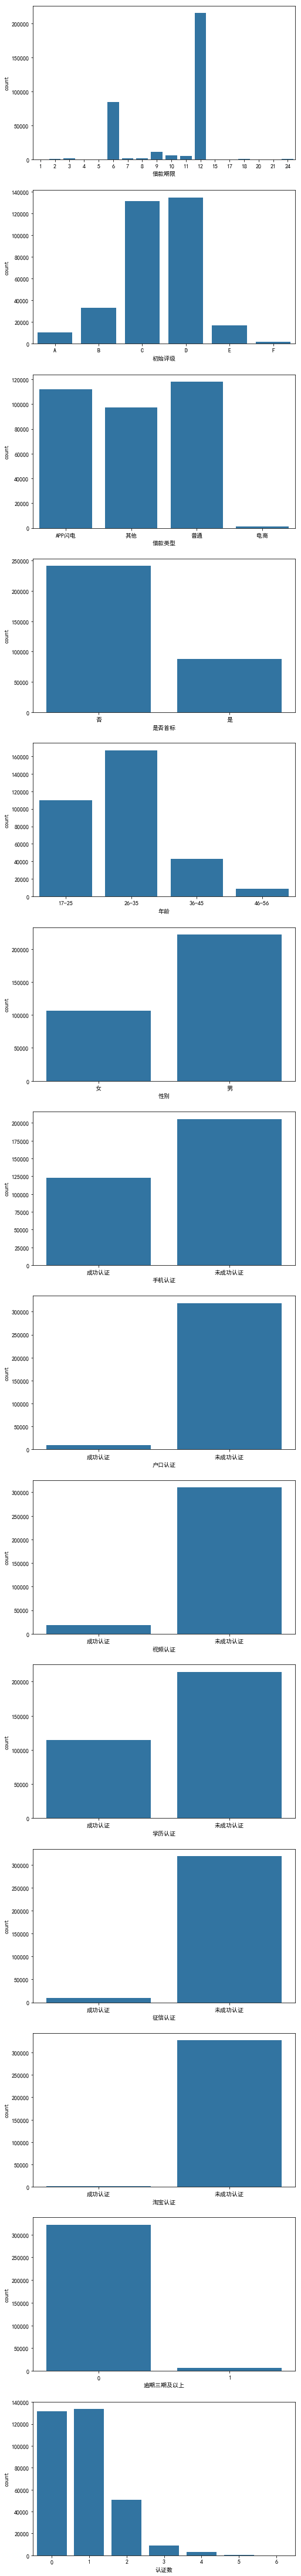

In [34]:
fig, ax = plt.subplots(nrows=14, figsize = [8,80])

default_color = sb.color_palette()[0]
columns=['借款期限','初始评级','借款类型','是否首标','年龄','性别','手机认证','户口认证','视频认证','学历认证','征信认证','淘宝认证','逾期三期及以上','认证数']
for i in range(14):
    sb.countplot(data = LC1, x = columns[i], color = default_color, ax = ax[i])
plt.show();

>1，借款期限主要集中在6、12两种类型。   
>2，初始评级大部分为C、D两个评级，后续查看是不是借款金额也是集中这两个评级。   
>3，借款类型中，电商分布较少，其他三个类型分布相差不大。   
>4，大部分客户不是首标，大部分客户为男性，年龄集中在17-35岁，其中26-35岁是贷款单最多的客户群体，大部分客户没有认证或者只通过其中一项认证。

### 单变量数据探索之数值数据探索

In [35]:
#定义需要log转换的金额类型列的直方图绘制函数
def log_distribution(bin_a,bin_b,bin_gap,plot_ticks,df,plot_column):
    bins=10**np.arange(bin_a,bin_b+bin_gap,bin_gap)
    ticks=plot_ticks
    labels=['{}'.format(v) for v in ticks]
    plt.hist(data=df,x=plot_column,bins=bins);
    plt.xscale('log');
    plt.xticks(rotation=30);
    plt.xticks(ticks,labels);
    plt.grid(True);

#### 借款金额数据探索

In [36]:
#查看分布范围，用来确定bin
np.log10(LC1["借款金额"].describe())

count    5.52
mean     3.65
std      4.05
min      2.00
25%      3.31
50%      3.53
75%      3.72
max      5.70
Name: 借款金额, dtype: float64

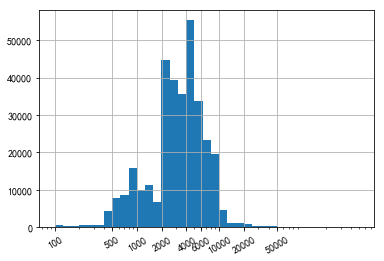

In [37]:
log_distribution(2,5.7,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC1,"借款金额")

借款金额几乎都在在400-20000元区间，也有少量其他值较大的，最大达到500000，但是总体分布呈双峰分布，分别是800-1000，2000-10000两个区间,后者集中数量最多。说明拍拍贷主要是小额贷款为主。

#### 借款利率数据探索

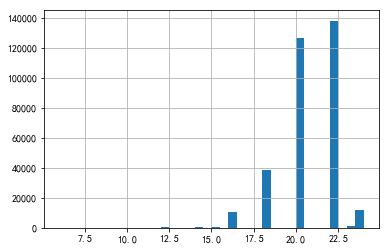

In [38]:
bins=np.arange(6,24+0.5,0.5)
plt.hist(data=LC1,x="借款利率",bins=bins);
plt.grid(True);

In [39]:
LC1['借款利率'].value_counts().sort_values(ascending=False).head(5)

22.0    137899
20.0    126330
18.0     38777
24.0     12077
16.0     10558
Name: 借款利率, dtype: int64

>借款利率主要集中在22，20，拍拍贷的总体利率偏高。

#### 历史成功借款次数数据探索

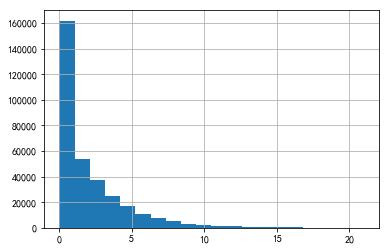

In [40]:
LC1["历史成功借款次数"].hist(range=(0,21),bins=20);

>绝大部分贷款单的客户历史借款次数在10次以内。对于数据集没有详细表述这个借款次数是包含其他平台的历史数据，还是只是拍拍贷的数据。

#### 历史成功借款金额探索

In [41]:
np.log10(LC1["历史成功借款金额"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.52
mean     3.94
std      4.54
min      -inf
25%      -inf
50%      3.70
75%      4.02
max      6.87
Name: 历史成功借款金额, dtype: float64

(400, 200000)

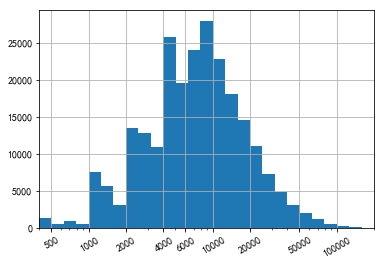

In [42]:
log_distribution(0,7,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000,100000],LC1,"历史成功借款金额")
plt.xlim(400,200000)#分布太过集中，放大区间看

>历史成功借款金额主要分布在400-10万的范围，log转换后呈单峰分布，8000-10000频率最多。

#### 总待还本金数据探索

In [43]:
np.log10(LC1["总待还本金"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.52
mean     3.57
std      3.94
min      -inf
25%      -inf
50%      3.41
75%      3.74
max      6.07
Name: 总待还本金, dtype: float64

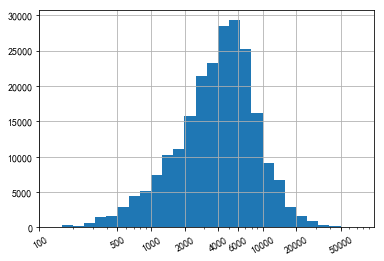

In [44]:
log_distribution(0,6,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC1,"总待还本金")
plt.xlim(100,100000);#分布太过集中，放大区间看

>总待还本金呈单峰分布，集中在集中在4000-8000频数最高。少数超过2万，说明整体待还本金的金额可控，可能是拍拍贷批复贷款的一项考察指标。

#### 剩余本金数据探索

In [45]:
np.log10(LC1["剩余本金"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.52
mean     3.26
std      3.44
min      -inf
25%      -inf
50%      3.04
75%      3.42
max      5.53
Name: 剩余本金, dtype: float64

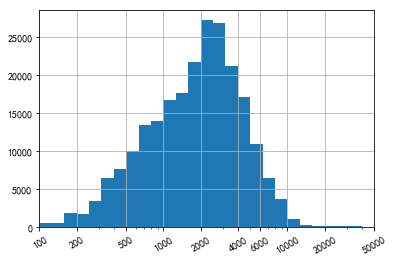

In [46]:
log_distribution(0,5.6,0.1,[100,200,500,1000,2000,4000,6000,10000,20000,50000],LC1,"剩余本金")
plt.xlim(100,50000);#分布太过集中，放大区间看

剩余本金呈单峰分布，集中在1000-5000范围内。

#### 剩余利息数据探索

In [47]:
np.log10(LC1["剩余利息"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.52
mean     2.16
std      2.45
min      -inf
25%      -inf
50%      1.78
75%      2.31
max      4.26
Name: 剩余利息, dtype: float64

D:\learning\lib\site-packages\matplotlib\axes\_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


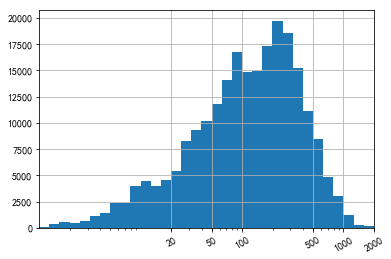

In [48]:
log_distribution(0,4.3,0.1,[0,20,50,100,500,1000,2000,6000,10000],LC1,"剩余利息")
plt.xlim(0,2000);#分布太过集中，放大区间看

剩余利息呈单峰分布，集中在集中在20-1000以内。

#### 逾期还款率及历史逾期还款率分布探索

>计算x轴上逾期还款率对应的百分比PDF,用柱形图表示，另外用线条显示累计的百分比。

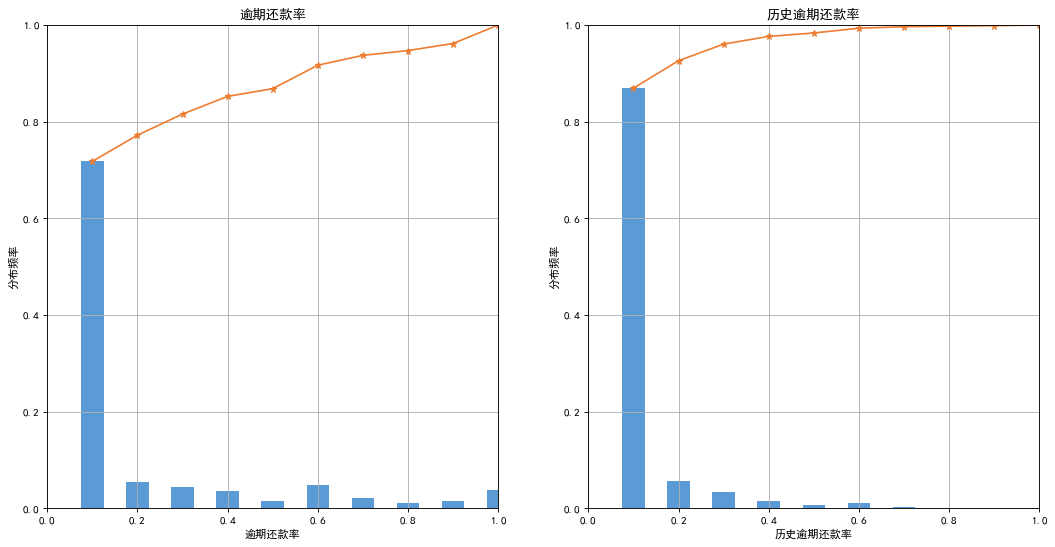

In [49]:
from scipy import stats
plt.figure(figsize=(16,8), dpi= 80)
plt.subplot(1,2,1)
LC_NOTNULL=LC1.loc[~(LC1["逾期还款率"].isnull())]
hist,bin_edges= np.histogram(LC_NOTNULL["逾期还款率"])
width=(bin_edges[1] - bin_edges[0]) * 0.5
pdf=hist/sum(hist)
plt.bar(bin_edges[1:], pdf,width=width,color='#5B9BD5');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, '-*', color='#ED7D31');
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.title("逾期还款率")
plt.xlabel("逾期还款率")
plt.ylabel("分布频率")


plt.subplot(1,2,2)
LC_NOTNULL=LC1.loc[~(LC1["历史逾期还款率"].isnull())]
hist,bin_edges= np.histogram(LC_NOTNULL["历史逾期还款率"])
width=(bin_edges[1] - bin_edges[0]) * 0.5
pdf=hist/sum(hist)
plt.bar(bin_edges[1:],pdf,width=width,color='#5B9BD5');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf, '-*', color='#ED7D31');
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.title("历史逾期还款率")
plt.xlabel("历史逾期还款率")
plt.ylabel("分布频率")
plt.legend()
plt.show();

>不是首标的用户，历史逾期还款率85%在10%内，探索订单的逾期总体还款率（包含首标和非首标）约70%在10%以内，可以看到历史逾期还款率的数据更加往左集中。可以猜测到拍拍贷在发放贷款时对非首标客户已经经过筛选。

### 逾期三期及以上的数据探索

#### 单变量分类数据

D:\learning\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


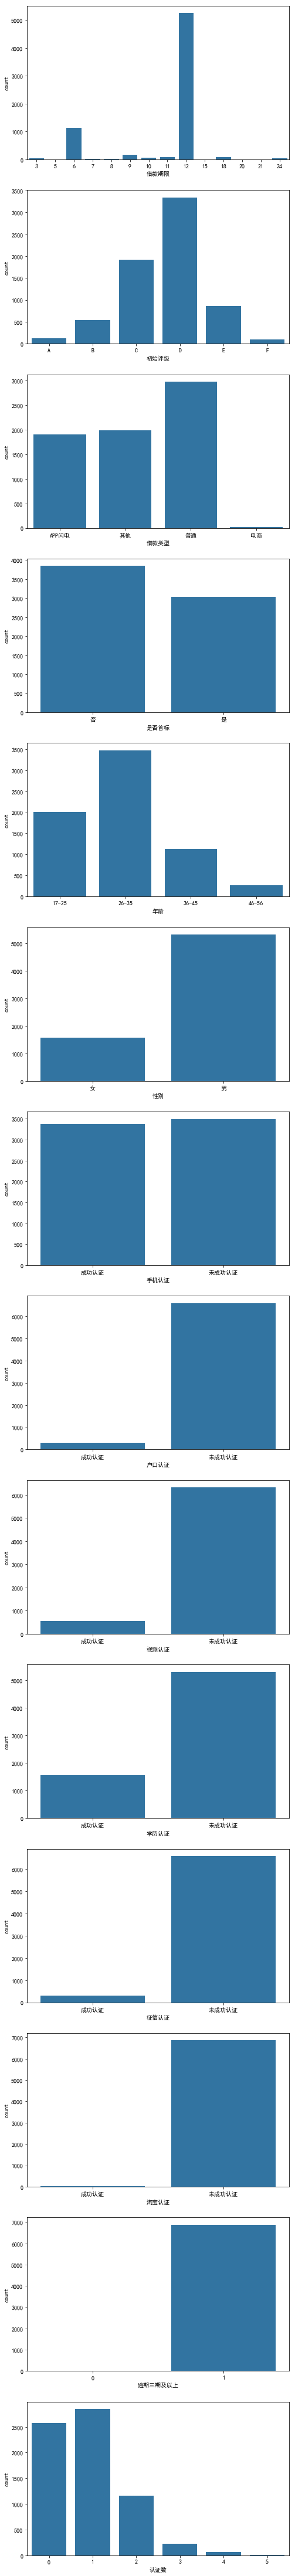

In [50]:
fig, ax = plt.subplots(nrows=14, figsize = [8,80])

default_color =basic_color
columns=['借款期限','初始评级','借款类型','是否首标','年龄','性别','手机认证','户口认证','视频认证','学历认证','征信认证','淘宝认证','逾期三期及以上','认证数']
for i in range(14):
    sb.countplot(data = LC3, x = columns[i], color = default_color, ax = ax[i])
plt.show();

>严重违约对比之前总体的分布主要分布特征，大体相同的有：6、12期数较多；C\D两种信用等级为主；电商类较少，26-35岁占比最高。男性较女性多。
同样是大部分没有认证。不能确认认证对严重违约是否有的影响作用。

#### 单变量数值类数据探索

In [51]:
LC3.describe()

,借款金额,借款期限,借款利率,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数,逾期还款期数,正常还款期数,剩余本金,剩余利息,历史逾期还款率,逾期还款率,认证数
count,6880.00,6880.00,6880.00,6880.0,6880.00,6880.00,6880.00,6880.00,6880.00,6880.00,6880.00,6880.00,3812.00,6880.00,6880.00
mean,4363.73,10.93,21.05,1.7,6081.26,2668.15,6.66,0.40,7.09,1.82,3149.35,271.04,0.06,0.81,0.89
std,6453.95,2.60,2.02,2.4,12022.43,4658.53,11.10,1.37,2.73,1.98,4884.04,374.54,0.14,0.19,0.87
min,100.00,3.00,12.00,0.0,0.00,0.00,0.00,0.00,3.00,0.00,51.48,2.07,0.00,0.19,0.00
25%,2224.75,12.00,20.00,0.0,0.00,0.00,0.00,0.00,5.00,0.00,1524.12,91.63,0.00,0.67,0.00
50%,3554.50,12.00,22.00,1.0,2000.00,771.67,2.00,0.00,7.00,1.00,2518.43,188.80,0.00,0.83,1.00
75%,5200.00,12.00,22.00,3.0,7500.00,4143.46,9.00,0.00,9.00,3.00,3962.66,351.66,0.05,1.00,1.00
max,260000.00,24.00,24.00,21.0,334000.00,184000.00,137.00,21.00,20.00,13.00,240000.00,11323.56,1.00,1.00,5.00


#### 借款金额数据探索

In [52]:
np.log10(LC3["借款金额"].describe())

count    3.84
mean     3.64
std      3.81
min      2.00
25%      3.35
50%      3.55
75%      3.72
max      5.41
Name: 借款金额, dtype: float64

(300, 30000)

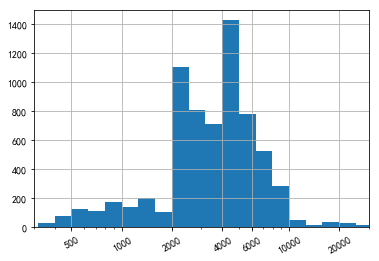

In [53]:
log_distribution(2.5,5.5,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC3,"借款金额")
plt.xlim(300,30000)

>借款金额主要集中在2000-10000元区间。

#### 历史成功借款金额探索

In [54]:
np.log10(LC3["历史成功借款金额"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.84
mean     3.78
std      4.08
min      -inf
25%      -inf
50%      3.30
75%      3.88
max      5.52
Name: 历史成功借款金额, dtype: float64

(300, 100000)

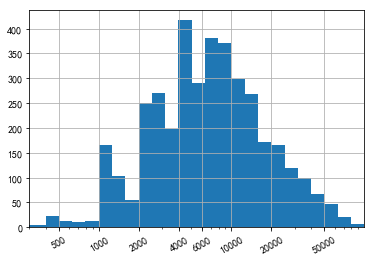

In [55]:
log_distribution(0,6.9,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC3,"历史成功借款金额")
plt.xlim(300,100000)

>严重逾期的分布与总体分布没有很大差别。

#### 借款利率数据探索

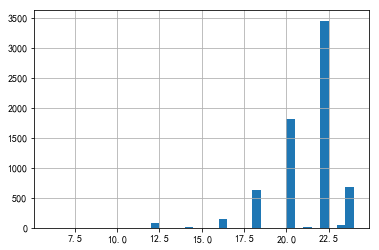

In [56]:
bins=np.arange(6,24+0.5,0.5)
plt.hist(data=LC3,x="借款利率",bins=bins);
plt.grid(True);

In [57]:
LC3['借款利率'].value_counts().sort_values(ascending=False).head(5)

22.0    3453
20.0    1807
24.0     685
18.0     626
16.0     150
Name: 借款利率, dtype: int64

>严重逾期客户的借款利率与总体分布差异不大。

#### 总待还本金数据探索

In [58]:
np.log10(LC3["总待还本金"].describe())

D:\learning\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    3.84
mean     3.43
std      3.67
min      -inf
25%      -inf
50%      2.89
75%      3.62
max      5.26
Name: 总待还本金, dtype: float64

(400, 50000)

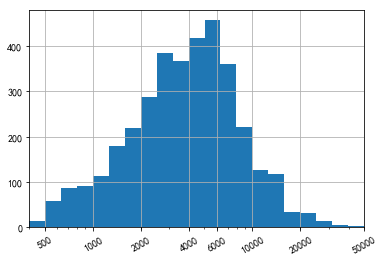

In [59]:
log_distribution(0,5.3,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC3,"总待还本金")
plt.xlim(400,50000)

呈单峰分布，集中在500-20000元内。

#### 剩余本金数据探索

In [60]:
np.log10(LC3["剩余本金"].describe())

count    3.84
mean     3.50
std      3.69
min      1.71
25%      3.18
50%      3.40
75%      3.60
max      5.38
Name: 剩余本金, dtype: float64

(100, 50000)

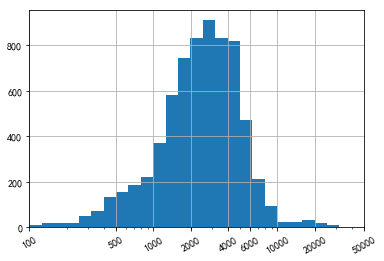

In [61]:
log_distribution(1.7,5.4,0.1,[100,500,1000,2000,4000,6000,10000,20000,50000],LC3,"剩余本金")
plt.xlim(100,50000)

>单峰分布，集中在1000-10000元内。

#### 逾期还款率及历史逾期还款率探索

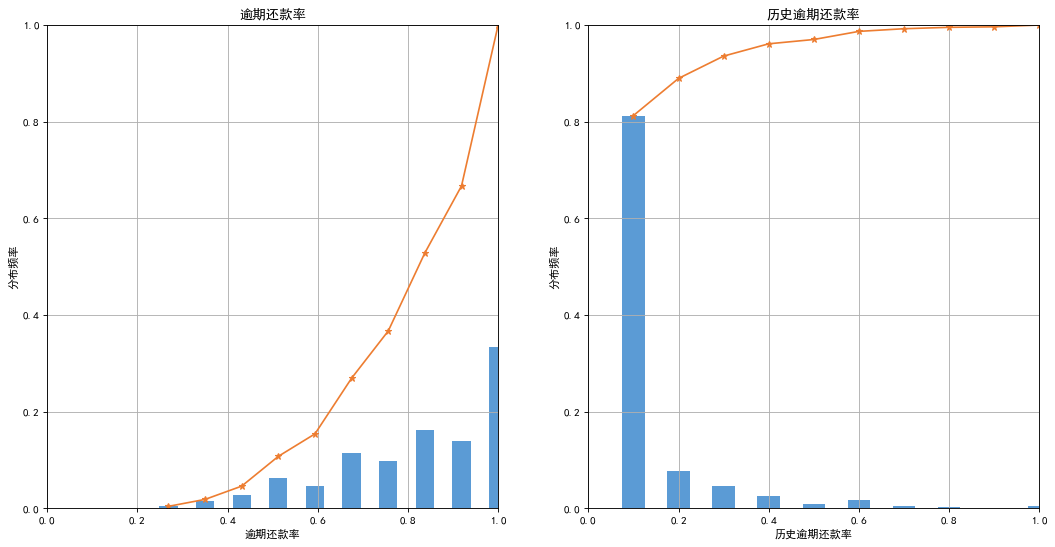

In [62]:
plt.figure(figsize=(16,8), dpi= 80)
plt.subplot(1,2,1)
hist,bin_edges= np.histogram(LC3["逾期还款率"])
width=(bin_edges[1] - bin_edges[0]) * 0.5
pdf=hist/sum(hist)
plt.bar(bin_edges[1:], pdf,width=width,color='#5B9BD5');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, '-*', color='#ED7D31');
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.title("逾期还款率")
plt.xlabel("逾期还款率")
plt.ylabel("分布频率")


plt.subplot(1,2,2)
LC_NOTNULL=LC3.loc[~(LC1["历史逾期还款率"].isnull())]
hist,bin_edges= np.histogram(LC_NOTNULL["历史逾期还款率"])
width=(bin_edges[1] - bin_edges[0]) * 0.5
pdf=hist/sum(hist)
plt.bar(bin_edges[1:],pdf,width=width,color='#5B9BD5');
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf, '-*', color='#ED7D31');
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.title("历史逾期还款率")
plt.xlabel("历史逾期还款率")
plt.ylabel("分布频率")
plt.legend()
plt.show();

>严重逾期的本期逾期还款率分布明显偏右，但是历史数据表现又很不错，说明通过历史数据并不能很好的控制违约风险。

### 数据结构介绍
> 清洗后的表有328553行，29列，分为三类：借款单信息，借款人信息，借款人历史借款信息。

> 'ListingId', '借款金额', '借款期限', '借款利率', '借款成功日期', '初始评级', '借款类型', '是否首标',
'年龄', '性别', '手机认证', '户口认证', '视频认证', '学历认证', '征信认证', '淘宝认证', '历史成功借款次数',
 '历史成功借款金额', '总待还本金', '历史正常还款期数', '历史逾期还款期数', '逾期还款期数', '逾期三期及以上',
 '正常还款期数', '剩余本金', '剩余利息', '历史逾期还款率', '逾期还款率', '认证数'

### 感兴趣的探索主题

> 我最感兴趣表中逾期还款率和逾期三期及以上，这两个字段的详细信息。

### 可能的相关因素

> 不明确，对于历史借款信息（信用评级、历史逾期还款情况、是否首标、年龄）和贷款单相关信息（金额、期数、利率）等应该有一定的相关性。

### 单变量探索总结

> 通过以上变量的分布，了解到该平台还是以小额信贷为主，借款期限主要集中在6、12两种类型。大部分在20000以内。借款利率频率最多的是22、20，该平台的利率偏高。初始评级大部分为C、D两个评级，借款类型中，电商分布较少，其他三个类型分布相差不大。大部分客户为男性，年龄集中在17-35岁，其中26-35岁是贷款单最多的客户群体，大部分客户没有认证或者只通过其中一项认证。因为探索的是逾期还款的情况，所以逾期还款期数、正常还款期数都转换为逾期还款率，否则根据期数没有具体的比较。逾期还款率绝大部分集中在20%以内。


### 探索中的数据转换

> 没有发现特别的异常分布，因为涉及到金额的图表都有长尾，所有都进行了对数转换。

## 双变量数据探索

### 所有数值列相关系数探索

>重点关注，影响逾期还款率的相关列，历史逾期还款率是否对逾期还款率有影响。先通过相关系数表查看下，是否有新发现。

In [63]:
#对数转换
LC1_copy=LC1.copy()
LC1_copy['借款金额']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['借款金额']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['历史成功借款金额']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['总待还本金']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['剩余本金']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['剩余利息']=LC1_copy['借款金额'].apply(log_trans)


In [64]:
LC1_copy['借款金额']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['历史成功借款金额']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['总待还本金']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['剩余本金']=LC1_copy['借款金额'].apply(log_trans)
LC1_copy['剩余利息']=LC1_copy['借款金额'].apply(log_trans)


Text(0.5,1,'所有列相关度')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text yticklabel objects>)

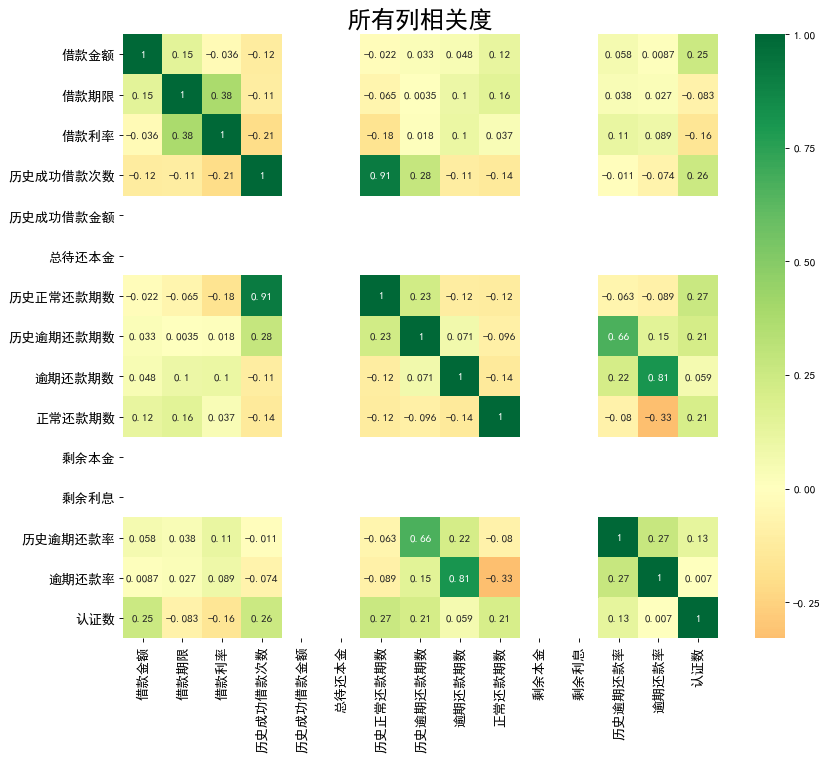

In [65]:
plt.figure(figsize=(12,10), dpi= 80)
sb.heatmap(LC1_copy.corr(), xticklabels=LC1_copy.corr().columns, yticklabels=LC1_copy.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('所有列相关度', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>初步探索到：
强相关性的有：历史正常还款期数-历史成功借款次数。
没有探索的与逾期还款率强相关的数值型变量。

Text(0.5,1,'所有列相关度')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text xticklabel objects>)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text yticklabel objects>)

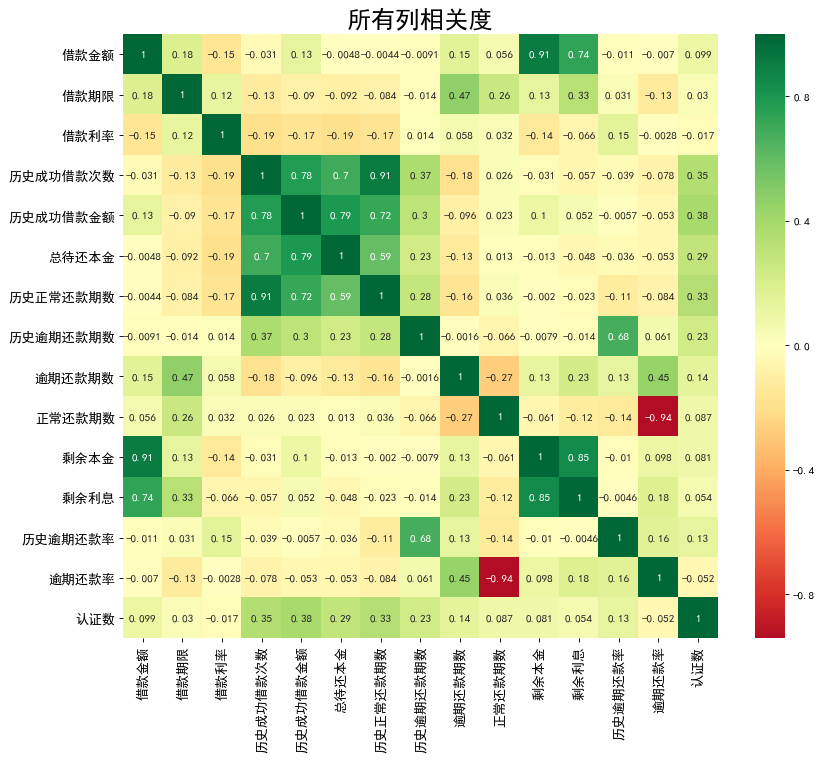

In [66]:
plt.figure(figsize=(12,10), dpi= 80)
sb.heatmap(LC3.corr(), xticklabels=LC3.corr().columns, yticklabels=LC3.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('所有列相关度', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

>严重逾期的数据仍然没有发现与逾期还款率相关性较高的列。

### 逾期还款率与历史逾期还款率 再次探索

>整体数据的逾期还款率与历史逾期还款率散点图分布

Text(0.5,0,'历史逾期还款率')

Text(0,0.5,'逾期还款率')

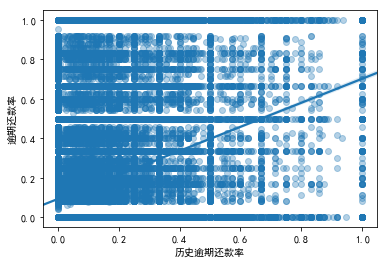

In [67]:
sb.regplot(data=LC1,x="历史逾期还款率",y="逾期还款率",scatter_kws = {'alpha' : 1/3});
plt.xlabel("历史逾期还款率")
plt.ylabel("逾期还款率")

>还款大于3期的数据的逾期还款率与历史逾期还款率散点图分布

Text(0.5,0,'历史逾期还款率')

Text(0,0.5,'逾期还款率')

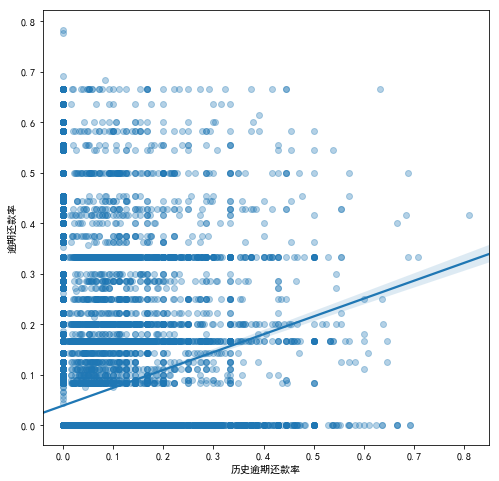

In [68]:
LC2=LC1[(LC1["历史正常还款期数"]>=4)&(LC1["正常还款期数"]>=4)&(LC1["初始评级"]=='C')]
plt.figure(figsize = (8,8))
sb.regplot(data=LC2,x="历史逾期还款率",y="逾期还款率",scatter_kws = {'alpha' : 1/3});
plt.xlabel("历史逾期还款率")
plt.ylabel("逾期还款率")

>严重逾期数据的逾期还款率与历史逾期还款率散点图分布

Text(0.5,0,'历史逾期还款率')

Text(0,0.5,'逾期还款率')

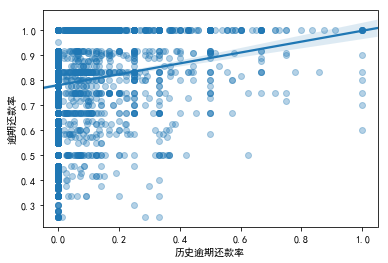

In [69]:
sb.regplot(data=LC3,x="历史逾期还款率",y="逾期还款率",scatter_kws = {'alpha' : 1/3});
plt.xlabel("历史逾期还款率")
plt.ylabel("逾期还款率")

**结论：逾期还款率与历史逾期还款率没有明确的相关性。但是历史逾期还款率总体比现在订单的逾期还款率表现要好。有相当多的严重逾期发生在以前历史逾期表现还不错的情况下。**

### 历史正常还款期数-历史成功借款次数

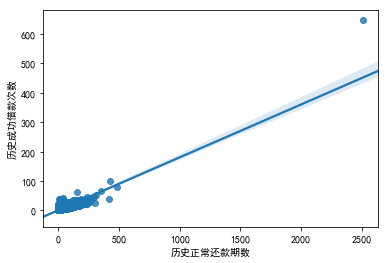

In [70]:
sb.regplot(LC1_copy["历史正常还款期数"],LC1_copy["历史成功借款次数"])

通过以上散点图的拟合线性回归可以大概了解到，历史正常还款期数与历史成功借款次数有正相关性，表明拍拍贷在审核贷款的时候，正常还款情况越好可以再次借到新的款项的可能性越大。

### 分类变量与逾期还款率的关系探索

D:\learning\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


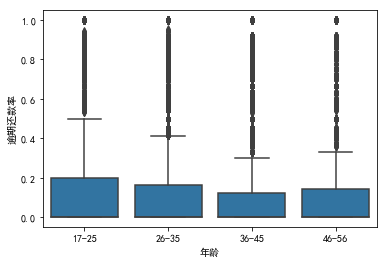

In [71]:
sb.boxplot(data=LC1,x="年龄",y="逾期还款率",color=basic_color);

D:\learning\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


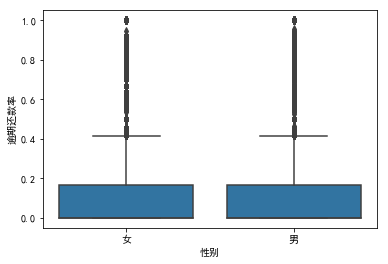

In [72]:
sb.boxplot(data=LC1,x="性别",y="逾期还款率",color=basic_color);

D:\learning\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


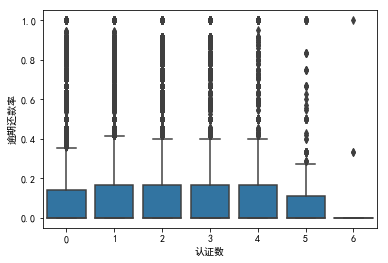

In [73]:
sb.boxplot(data=LC1,x="认证数",y="逾期还款率",color=basic_color);

D:\learning\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


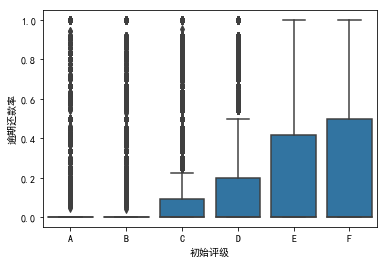

In [74]:
sb.boxplot(data=LC1,x="初始评级",y="逾期还款率",color=basic_color);

**通过以上探索，可以了解到，信用评级越低，出现逾期还款的可能性越大。所以拍拍贷针对不同评级的客户，在风险把控上需要分别具体把控。**

### 初始评级的探索

D:\learning\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


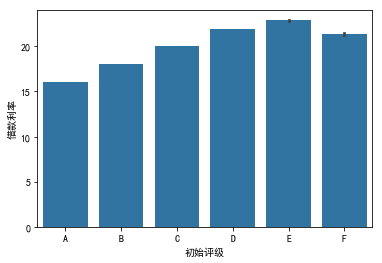

In [75]:
sb.barplot(x="初始评级",y="借款利率",data=LC1,color=basic_color)

>初始评级越低，平均贷款利率越高，但是F级稍微有点偏差。

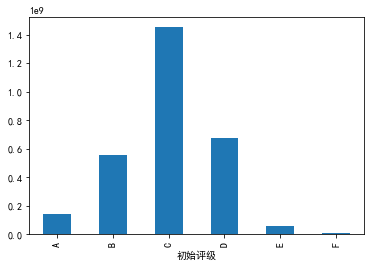

In [76]:
LC1["历史成功借款金额"].groupby(LC1["初始评级"]).sum().plot(kind='bar');

>将历史借款金额按信用评级分类后汇总，可以发现：发放给C\D两个评级的贷款总额超过了所有贷款总额的50%以上，说明这两个评级是公司的最主要客户，因此对这两个群体的信用风险评估需要做更加细致的工作。

### 借款期限与逾期还款率

D:\learning\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


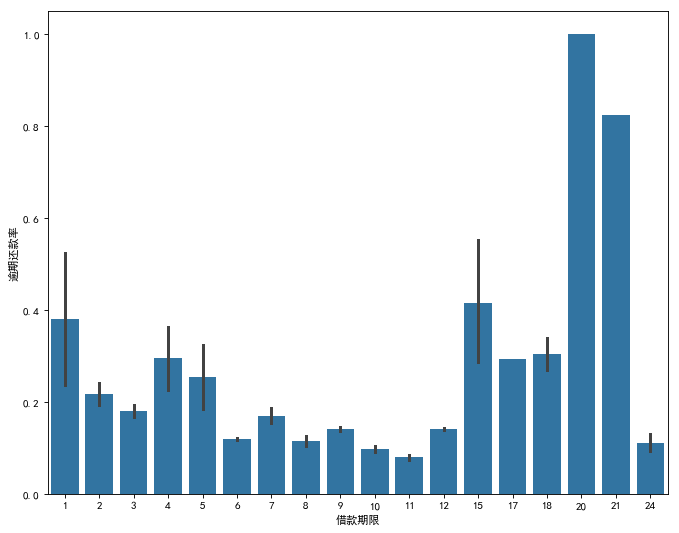

In [77]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="借款期限",y="逾期还款率",data=LC1,color=basic_color)

>还款期限20,21期的逾期还款率明显偏高。


### 双变量探索发现总结

> 逾期还款率随信用等级而有序变化，信用等级越高的客户，逾期还款率越低。  
> 历史正常还款期数与历史成功借款次数有正相关性，表明拍拍贷在审核贷款的时候，正常还款情况越好可以再次借到新的款项的可能性越大。  
>还款期限20,21期的逾期还款率明显偏高。  
>很遗憾，多方面探索发现，逾期还款率与历史逾期还款率没有明确相关性。说明历史逾期还款率还要结合其他变量一起来考虑对逾期还款率的相关性。

### 双变量探索有趣的发现

> 信用等级越低的客户，发放贷款的借款利率会相应增高。但是F等级稍有点例外，可能这个等级可以批贷款的话有其他有可信条件参考。  
>总体上，年龄越大逾期还款率越低。

## 多变量关系探索

### 各信用等级中，严重逾期的占比

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5,1,'各信用等级中，严重逾期的占比情况')

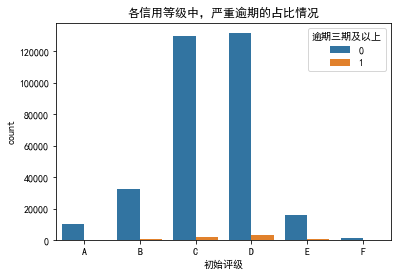

In [78]:
sb.countplot(data=LC1,x='初始评级',hue='逾期三期及以上');
plt.title("各信用等级中，严重逾期的占比情况")

>还是主要集中在C D两个评级。

### 各信用等级下认证次数与逾期还款率

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


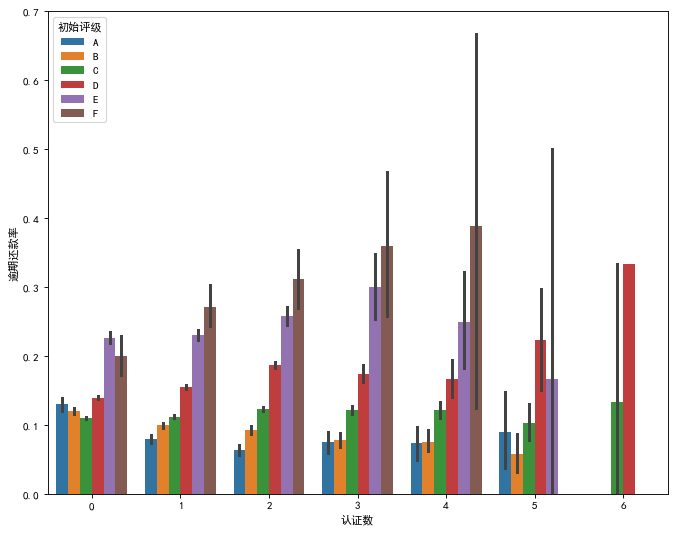

In [79]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="认证数",y="逾期还款率",hue="初始评级",data=LC1)

> 认证次数与逾期还款率没有明显的关系，没有明显的统计趋势，但是有个有趣的发现，认证全部通过的D级客户反而逾期还款率偏高，猜测是有可能这些客户故意通过多数认证来争取贷款而后续却有计划地违约。

### 各信用等级下年龄与逾期还款率关系

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


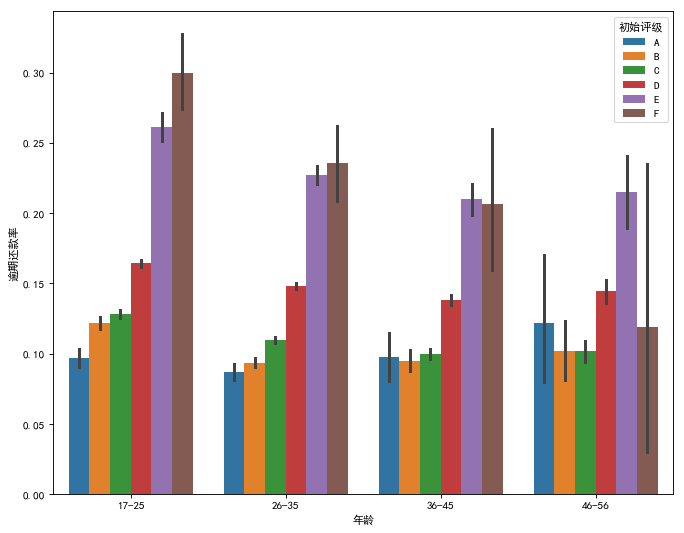

In [80]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="年龄",y="逾期还款率",hue="初始评级",data=LC1)

> 整体的逾期还款率都随着年龄的增大而有降低的趋势。年龄组内，进一步确认了，信用评级跟逾期还款率的关系，评级越低，逾期风险越大。
有趣的发现，46-56的客户虽然我们认为还款能力在降低，但是违约率并没有更高。对于这个群体的放款审核模式可以继续保留。

### 各信用等级下性别与逾期还款率关系

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


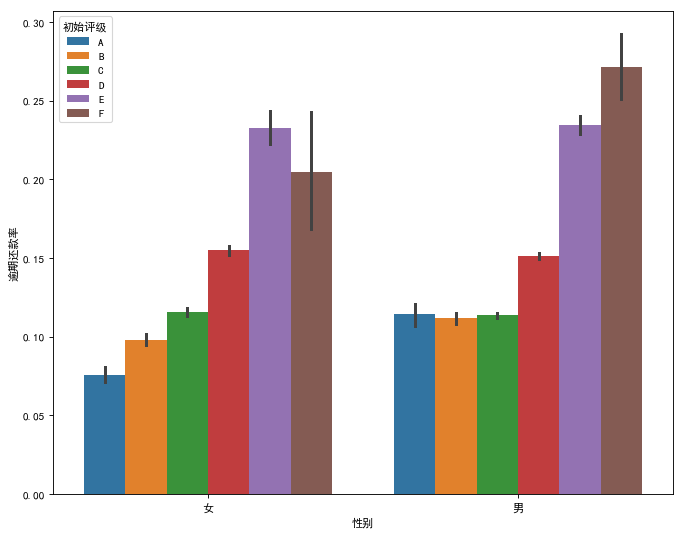

In [81]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="性别",y="逾期还款率",hue="初始评级",data=LC1)

> 男、女的逾期还款率没有明显差异。

### 各信用等级下首标与否的逾期还款率分布

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


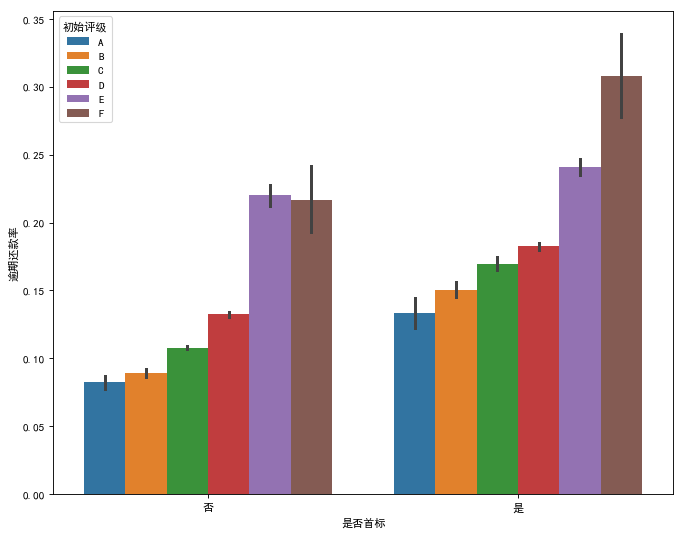

In [82]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="是否首标",y="逾期还款率",hue="初始评级",data=LC1)

> 首标的各信用等级平均逾期还款率比非首标的要高，表明，首标用户的信用违约率需要更加强管控。

### 各信用评级下借款类型与逾期还款率

D:\learning\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


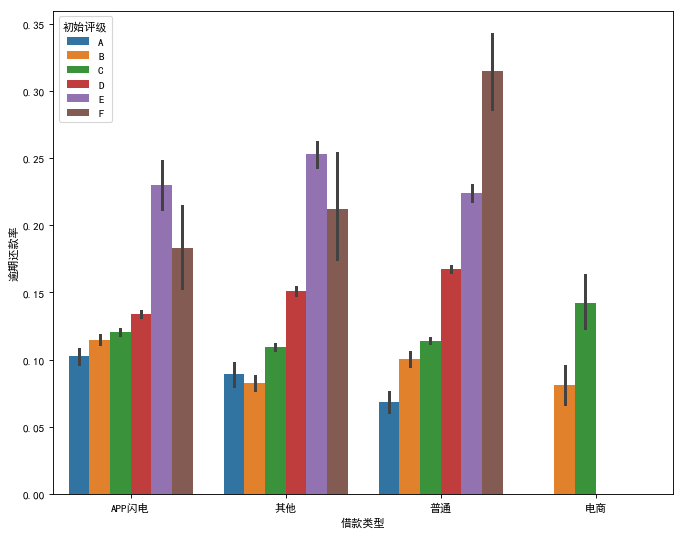

In [83]:
plt.figure(figsize=(10,8), dpi= 80)
sb.barplot(x="借款类型",y="逾期还款率",hue="初始评级",data=LC1)

>各借款类别的逾期还款率没有明显差异，但是普通类F等级客户需要加强管理，违约率偏高。另外可以看到电商类的客户主要是B\C两个等级。

### 各信用评级下历史成功借款次数与逾期还款率

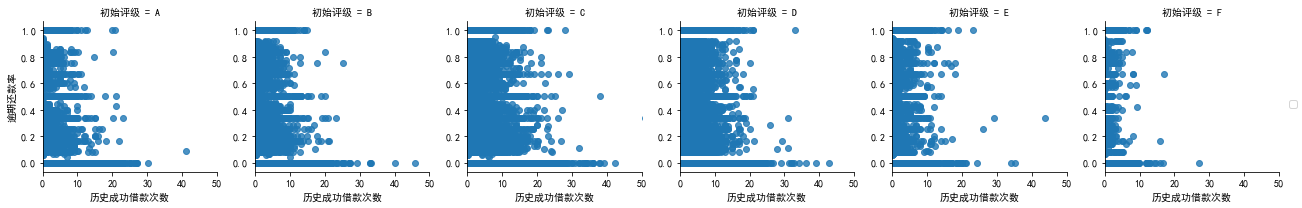

In [84]:
g = sb.FacetGrid(LC1, col="初始评级", sharex=True, sharey=True,xlim=(0,50))
g.map(sb.regplot, "历史成功借款次数", "逾期还款率", 
      fit_reg=False, x_jitter=.2)
g.add_legend();

> 各等级在借款次数30次以上的违约率大幅降低，风险相对可控。

### 多变量关系探索总结

> 整体的逾期还款率都随着年龄的增大而有降低的趋势。年龄组内，进一步确认了，信用评级跟逾期还款率的关系，评级越低，逾期风险越大。  
> 男、女的逾期还款率没有明显差异。  
> 首标的各信用等级平均逾期还款率比非首标的要高，表明，首标用户的信用违约率需要更加强管控。  
> 各等级在借款次数30次以上的违约率大幅降低，风险相对可控。

### 多变量关系有趣的发现
> 有趣的发现，46-56的客户虽然我们认为还款能力在降低，但是违约率并没有更高。对于这个群体的放款审核模式可以继续保留。  
> 总体分布中认证次数与逾期还款率没有明显的关系，没有明显的统计趋势，但是有个有趣的发现，认证全部通过的D级客户反而逾期还款率偏高，猜测是有可能这些客户故意通过多数认证来争取贷款而后续却有计划地违约。但是对于逾期三期以上的客户，认证次数越多，逾期还款率越低。